In [ ]:
!git clone https://github.com/NohanJoemon/SummerSchool-Assignment-Day2.git

Cloning into 'SummerSchool-Assignment-Day2'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 98 (delta 7), reused 6 (delta 0), pack-reused 76
Unpacking objects: 100% (98/98), done.


In [ ]:
%cd SummerSchool-Assignment-Day2/Nohan_ch19b072

/content/SummerSchool-Assignment-Day2/Nohan_ch19b072


# Question 1

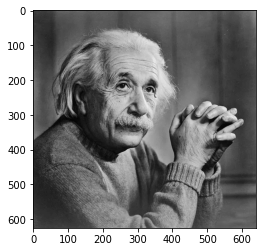

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('media/einstein.jpg',0)
plt.imshow(img,cmap='gray')

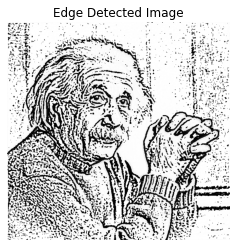

In [ ]:

blur_gaus1 = cv2.GaussianBlur(img,(5,5),3)
blur_gaus2 = cv2.GaussianBlur(img,(9,9),4)
edge_detector = blur_gaus2 - blur_gaus1

#Plotting the images
plt.figure(),plt.axis("off"),plt.title("Edge Detected Image"),plt.imshow(edge_detector,cmap="gray")
plt.show()

# Question 2

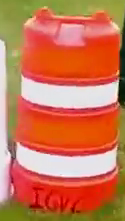

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# image of interested object ( barrel)
interest_image=cv2.imread("media/barrel.jpg",1)

# converting to hsv
interest_image_hsv=cv2.cvtColor(interest_image,cv2.COLOR_BGR2HSV)

cv2_imshow(interest_image)


In [ ]:

import cv2
print("Images captured: ")
for t in range(240000,242001,1000):
    video_object = cv2.VideoCapture("media/barrel_vdo.mp4")
    video_object.set(cv2.CAP_PROP_POS_MSEC, t)
    ret,frame = video_object.read()
    print("\n\n\n\nImage captured at time = ",t/1000," seconds")
    cv2_imshow(frame)
        
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    interest_image_hist = cv2.calcHist([interest_image_hsv],[0,1], None, [180,256], [0,180,0,256] )
    interest_image_norm=cv2.normalize(interest_image_hist,None,0,255,cv2.NORM_MINMAX)


    res = cv2.calcBackProject([frame_hsv],[0,1],interest_image_norm,[0,180,0,256],1)

    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
    cv2.filter2D(res, -1, disc, res) #res is the matrix obtained after back projection

    ret,thresh = cv2.threshold(res,90,255,0)
    final = cv2.merge((thresh, thresh, thresh))

    result = cv2.bitwise_or(frame, final)

    print("\n Resultant image")
    plt.axis('off')
    cv2_imshow(result)